# Анализ результатов АВ-теста

## Описание проекта

** Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.**
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. 

**Варианты решений:**  
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

## Загрузка данных и подготовка их к анализу 

In [1]:
# Импортируем бибилиотеки
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

In [2]:
# Подгружаем данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Предобработка датафрейма с гипотезами

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option('display.max_colwidth', 210)
hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Датафрейм небольшой, данные корректные, типы правильные, дубликатов нет - таблица готова к анализу.

### Предобработка датафрейма с заказами

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# Приведем данные столбца с датами к типу datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
orders['date'].describe()

/tmp/ipykernel_248/4197849394.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['date'].describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [10]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [11]:
# Проверим датафрейм на дубликаты
print('Кол-во дубликатов =',orders.duplicated().sum())

Кол-во дубликатов = 0


Все данные корректны, целостны, дубликатов нет: таблица готова к анализу. В процессе предобработки был изменен только тип столбца "date" на datetime

### Предобработка датафрейма с данными посетителей

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# Приведем данные столбца с датами к типу datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors['date'].describe()

/tmp/ipykernel_248/511156166.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visitors['date'].describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [17]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [18]:
# Проверим датафрейм на дубликаты
print('Кол-во дубликатов =',visitors.duplicated().sum())

Кол-во дубликатов = 0


Все данные корректны, целостны, дубликатов нет: таблица готова к анализу. В процессе предобработки был изменен только тип столбца "date" на datetime, также, как и в таблице с заказами. Все данные готовы к анализу.

## Приоритизация гипотез 

In [19]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворков ICE и RICE 

In [20]:
#Применим фреймворк ICE для приоритизации гипотез. 
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
#Применим фреймворк RICE для приоритизации гипотез. 
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [21]:
# Отсортируем ICE по убыванию приоритета.
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [22]:
# Отсортируем RICE по убыванию приоритета.
pd.set_option('display.max_colwidth', 500)
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


### Вывод 
Хорошо видны различия в обеих таблицах. Тройка лидеров изменчива: если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7(была на 3 месте), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился аж на пятую позицию, в то время как 2 поднялся на второе место с пятого. Такое отличие продиктовано тем, что во фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок (в 7 он =10 - максимальный! Во 2-й он =8,тоже высокий, а в лидере ICE - в 8 он минимальный =1). Поэтому я считаю, что нужно предложить для тестирования гипотезы №7 и №2. 

##  Анализ A/B-теста 

### График кумулятивной выручки

In [23]:
# Рассчитаем усредненную (медианную) выручку за день в каждой группе
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [24]:
# Сравним идентичны ли даты и группы в таблицах посетителей и заказов, чтобы можно было объединить таблицы по столбцу date
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [25]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
compare_dg

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


In [26]:
compare_dg['date'].sum() , compare_dg['group'].sum()

(62, 62)

Все пары дата-группа в таблицах visitors и orders совпадают, можно объединять.

In [27]:
# Создадим таблицу кумулятивных данных по обеим таблицам

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


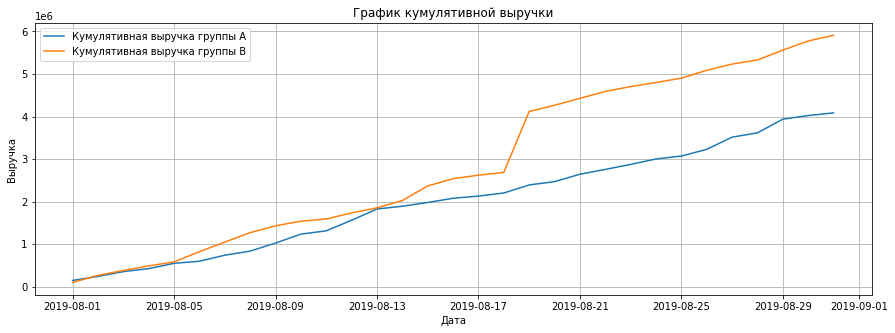

In [28]:
# Построим графики кумулятивной выручки обеих групп
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка группы B')
plt.grid()
plt.legend()
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка');

В первой половине месяца видно, что выручка в группе "B" растёт чуть быстрее, чем в "A". 13 августа выручки примерно равны. А вторая половина месяца окончательно расставляет всё по местам, - группа "B" однозначно лидер, её выручка значительно больше. Но обязательно надо отметить сильный всплеск выручки в группе "B" 19 августа, скорее всего это были (был) крупные заказы, а без них, по графикам можно предположить, что выручки росли примерно одинаково или же в этот день было очень много заказов.

In [29]:
# Посмотрим отдельно на выручку 19 августа по срезу данных
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


Количество заказов 19 августа примерно такое же, как и в соседние даты

In [30]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 19 августа = 2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


Нашелся аномально большой заказ под номером 425 на ~1,3млн в группе "B" 19 августа (в 492 раза больше медианы=2630 за этот день) - этот заказ принес около 30% дневной выручки (1,29 / 4,12); в то время как остальные заказы не больше 44 тысяч . Поскольку этот заказ один, то его в принципе можно считать выбросом и при дальнейшем анализе это надо учитывать.

### График кумулятивного среднего чека 

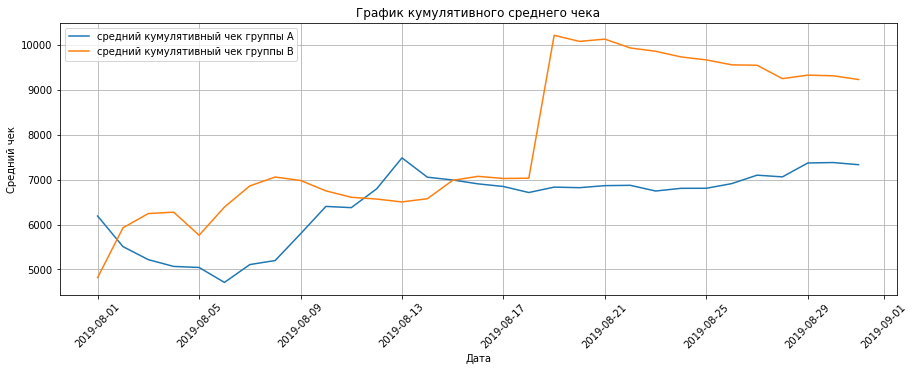

In [31]:
#Чтобы построить графики среднего кумулятивного чека по группам, разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() ;

Здесь есть некоторая схожесть с графиком кумулятивной выручки. В первой половине в группе "B" чек преимущественно больше, но есть даты где и наоборот - чек больше в "A" - это начало 1 августа и 12-14 августа. Далее чек группы "B" стабильно больше. Но также на графике видно сильное влияние аномально большого заказа №425, кстати после этого заказа (19 августа) средний чек в "B" постепенно пошел снижаться, в то время как в "A" он с 18 августа постепенно растет.

### График относительного изменения кумулятивного среднего чека 

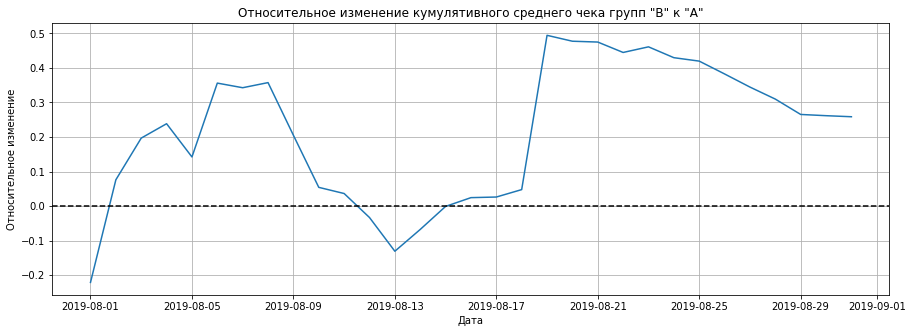

In [32]:
# Cобираем данные в одну таблицу и строим график относительного изменения кумулятивного среднего чека групп
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--') ;

Поскольку этот график является производным от пункта 4.2, то и выводы по большей части аналогичные. Средний чек "B" рос с 1 августа, 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, причем 3 дня 12-14 акгуста средний чек "A" был больше "B". Но ненадолго, с 13 чек "B" опять начал расти и уже 15 августа наступил переломный момент и на следующий день чек "B" оказался больше и был больше "A" до конца месяца. Опять же здесь хорошо видно, что 19 августа был сильный всплеск (рост) за счет заказа №425 с аномально большим объемом, а в последующие дни средний чек "B" также постепенно снижался.

### График кумулятивной конверсии

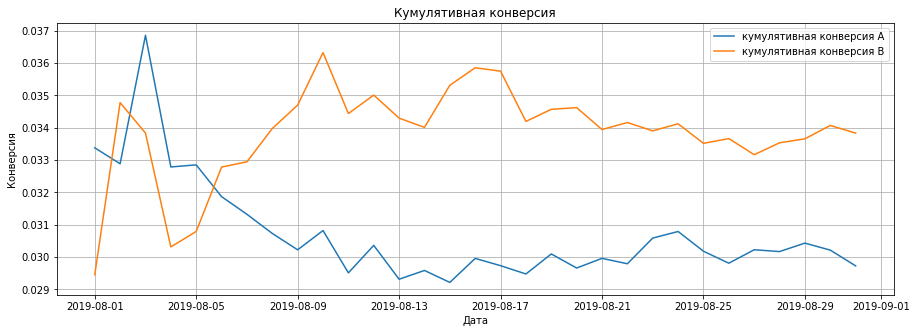

In [33]:
# Аналогично проанализируем график кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend();

С начала месяца конверсия 1-5 августа конверсия "A" была значительно больше, 3 августа она была максимальной за весь период наблюдения между группами (исключение 2 августа); и после пика она начала сильно падать. С 9 августа наблюдается стагнация в минимальном диапазоне 0,029-0,031. Конверсия группы "B" с 4 августа начала расти и уже 6 августа превысила конверсию "A" и росла до 10 августа чуть выше 0,036; затем пошло постепенное снижение, с имевшим место всплеском роста конверсии 15-17 августа до чуть ниже 0,036. Можно сделать вывод - конверсия группы "B" в целом значительно больше "A" (начиная с 6 августа стабильно конверсия "B" больше "A")

### График относительного изменения кумулятивной конверсии

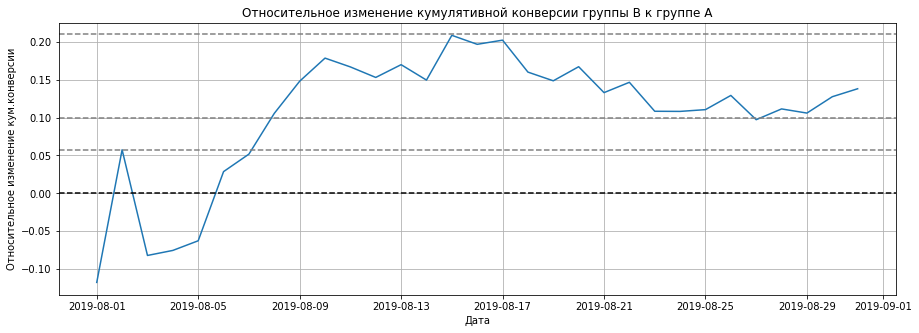

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кум.конверсии');
 

Поскольку данный график является производным от пункта 4.4, то и большая часть выводов очень схожа. С 1 по 5 августа - несколько дней когда конверсия в "A" была больше на 5-10%; но исключение составляет 2 августа - был сильный рост конверсии в группе "B" и по итогу дня результат "B" был на 5% больше "A" (надо отметить, что 2 августа был сильный рост конверсий в обеих группах, возможно проводилась маркетинговая акция или были скидки) - это было видно еще в пункте 4.4). Начиная с 6 августа группа "B" лидировала до конца периода; её конверсия росла до 15 августа и разница с "A" на максимуме составила 21%, затем пошло постепенное снижение отностельной конверсии до 10%-14%.

### График количества заказов по пользователям 

In [35]:
# Построим точечный график количества заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


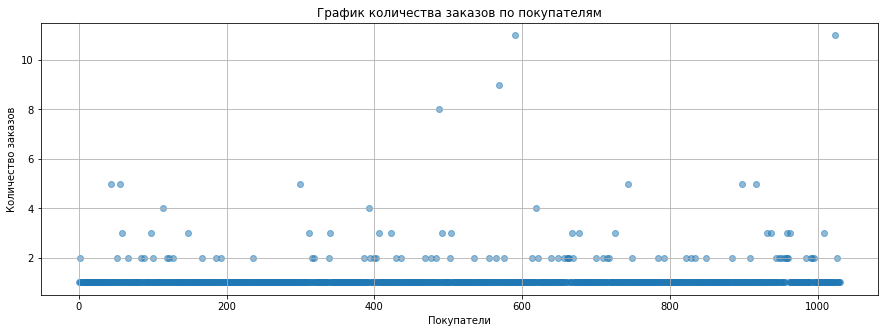

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по покупателям')
plt.xlabel('Покупатели')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

Больше всего пользователей, которые совершили 1 заказ. Тех, кто сделал 2 заказа уже не так много. И уже тех, кто совершил 3 заказа, совсем мало, и считать ли это выбросами пока не ясно - надо посчитать процентили (95 и 99). А все, что выше 3 заказов - явно уже аномалия.

### Граница заказов для определения аномальных пользователей

In [37]:
print('Расчет 95 и 99 перцентилей по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Расчет 95 и 99 перцентилей по заказам :  [2. 4.]


In [38]:
# Для большей точности рассчитаем все процентили с 95 по 99
print('Расчет перцентилей по заказам с 95 по 99 :', np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])) 

Расчет перцентилей по заказам с 95 по 99 : [2. 2. 2. 3. 4.]


Теперь точно видно, что большинство пользователей делают 1 или 2 заказа. Всё что выше - это аномалия.

### График стоимостей заказов

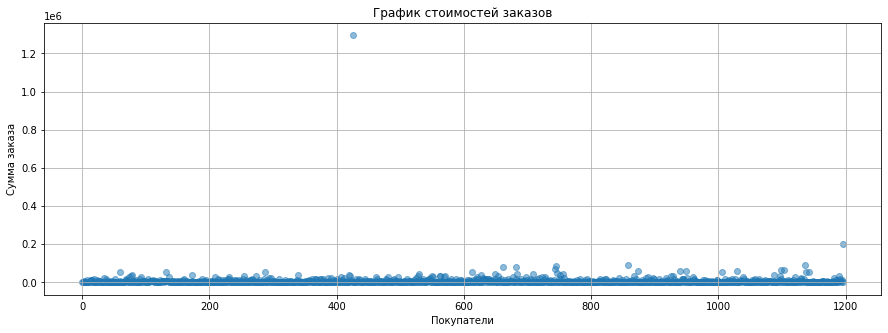

In [39]:
# Построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Покупатели')
plt.ylabel('Сумма заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

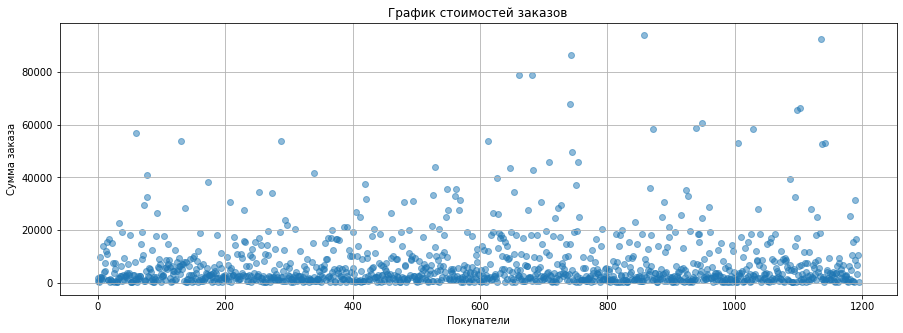

In [40]:
# Построим еще один график без явных выбросов
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Покупатели')
plt.ylabel('Сумма заказа')
plt.scatter(xn_values, norm_orders, alpha=0.5);

Хорошо видно тот самый аномальный заказ №425 на 1.3 млн и еще один на ~200 тысяц, остальные примерно не больше 100 тысяч. Чтобы найти более точную границу аномальных заказов рассчитаем процентили.

### Граница для определения аномальных заказов по выручке

In [41]:
print('Рассчитаем 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по выручке заказов :  [28000.  58233.2]


99% заказов меньше суммы 58233.2 , установим её в качестве границы для аномалий.

### Различия в конверсии между группами по «сырым» данным

Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их:

In [42]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [43]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [44]:
# Сгруппируем данные по группам А и В
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [45]:
# Объединим рассчитанные данные в одну таблицу
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
20,2019-08-21,23,174309,14,163077,385,2643838,437,4426892,646,656,12850,12874
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
12,2019-08-13,14,263638,21,119671,244,1826511,285,1853738,748,769,8323,8310


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу возьмём следующее: "Статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет такой: "Статистически значимые различия есть".

In [46]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Вывод: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. По «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным 

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.
За нулевую гипотезу возьмём следующее: "Статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет такой: "Статистически значимые различия есть".

In [47]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A (на ~26% !).

### Различия в конверсии между группами по «очищенным» данным 

Из предыдущих пунктов мы приняли за аномальных пользователей тех, кто совершил 3 и больше заказов или совершил заказ дороже 58233.2 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [48]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего аномальных пользователей = 31


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [49]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам. За нулевую гипотезу возьмём следующее: "Статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет такой: "Статистически значимые различия есть".


In [50]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


Вывод: p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%) .

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посмотрим, как повлияло очищение данных на результаты по среднему чеку.  За нулевую гипотезу возьмём следующее: "Статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет такой: "Статистически значимые различия есть".

In [51]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "сырыми" данными). А вот средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж на ~26%, - и всё это из-за одного того самого аномального заказа №425 на 1,3 млн !

## Итоговое решение по результатам A\B тестирования

**Данные для проведения теста** поступили корректными, целостными, дубликатов не было выявлено, после небольшой предобработки  таблица былаготова к анализу. В процессе предобработки был изменен только тип столбца "date" на datetime, также, как и в таблице с заказами. Все данные готовы к анализу.

**После расчета ICE и RICE** были приоритизированы гипотезы из общего списка. Хорошо были видны различия в обеих таблицах. Тройка лидеров изменчива: если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7(была на 3 месте), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился аж на пятую позицию, в то время как 2 поднялся на второе место с пятого. Такое отличие продиктовано тем, что во фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок (в 7 он =10 - максимальный! Во 2-й он =8,тоже высокий, а в лидере ICE - в 8 он минимальный =1). Поэтому гипотезы №7 и №2 были предложены к тестированию.

**По результатам тестирования было выявлено:** 

- И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным.

- Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на ~26%, - и всё это из-за одного того самого аномального заказа №425 на 1,3 млн ! Всё логично аномальный заказ убрали и чеки сравнялись ( метод A/B тестирования не обманешь выбросами :) )

В итоге можно принять решение **остановить тестирование и констатировать успех и победу группы B** : группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.